# Quantum entanglement tests based on the CHSH inequality
Oleksandr Yasinskyi 150570

In [1]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer, Aer
from qiskit.visualization import *
from matplotlib import pyplot as plt

backend = Aer.get_backend('qasm_simulator')
backend2 = BasicAer.get_backend('statevector_simulator')
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
def start(circuit):
    job_simX = execute(circuit, backend, shots=shots)
    sim_resultX = job_simX.result()
    return sim_resultX.get_counts(circuit)

def plot(circuit, plot_path):
    results = [start(circuit) for _ in range(5)]
    executions = ["First", "Second", "Third", "Fourth", "Fifth"]
    legend = [exec + " execution" for exec in executions]
    colours = ['crimson', 'green', 'midnightblue', 'magenta', 'cyan']
    
    fig, ax = plt.subplots(ncols=2)
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.2)
    plot_histogram(results, color=colours, title="Probability", ax=ax[0])
    plot_distribution(results, legend=legend, color=colours, title="Distribution [counts]", ax=ax[1])
    plt.savefig(plot_path) 
    plt.show()
    return results

def calcutations_table(measurement):
    r = 0
    for i in ['00', '01', '10', '11']:
        if i[0] == '0':
            y = 1
        else:
            y = -1
        if i[1] == '0':
            x = 1
        else:
            x = -1
        display(f"& {i} & {x:2d} & {y:2d} & {x * y:2d} & {measurement[i] / 1024:.7f} & {measurement[i] / 1024 * x * y:.7f} \\")
        r += measurement[i] / 1024 * x * y
    return r

In [3]:
n = 2
shots = 1024
nx = n # number of qubits/bits

plots_path = "./Plots/project2/"

## X ⊗ W

In [4]:
qx= QuantumRegister(nx,'q')
cx= ClassicalRegister(nx,'c')
circuitX=QuantumCircuit(qx,cx)

circuitX.x(qx[0])
circuitX.x(qx[1])

circuitX.barrier(qx[0],qx[1])
circuitX.h(qx[0])
circuitX.cx(qx[0],qx[1])

circuitX.barrier(qx[0],qx[1])
circuitX.s(qx[0])
circuitX.h(qx[0])
circuitX.t(qx[0])
circuitX.h(qx[0])

circuitX.h(qx[1])

circuitX.barrier(qx[0],qx[1])
circuitX.measure(qx[0],cx[0])
circuitX.measure(qx[1],cx[1])

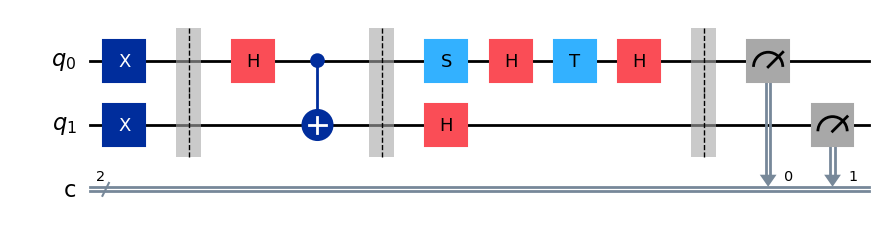

In [5]:
fig = circuitX.draw(output='mpl', style="iqp")
fig.savefig(plots_path + "xw_circuit.png") 
fig

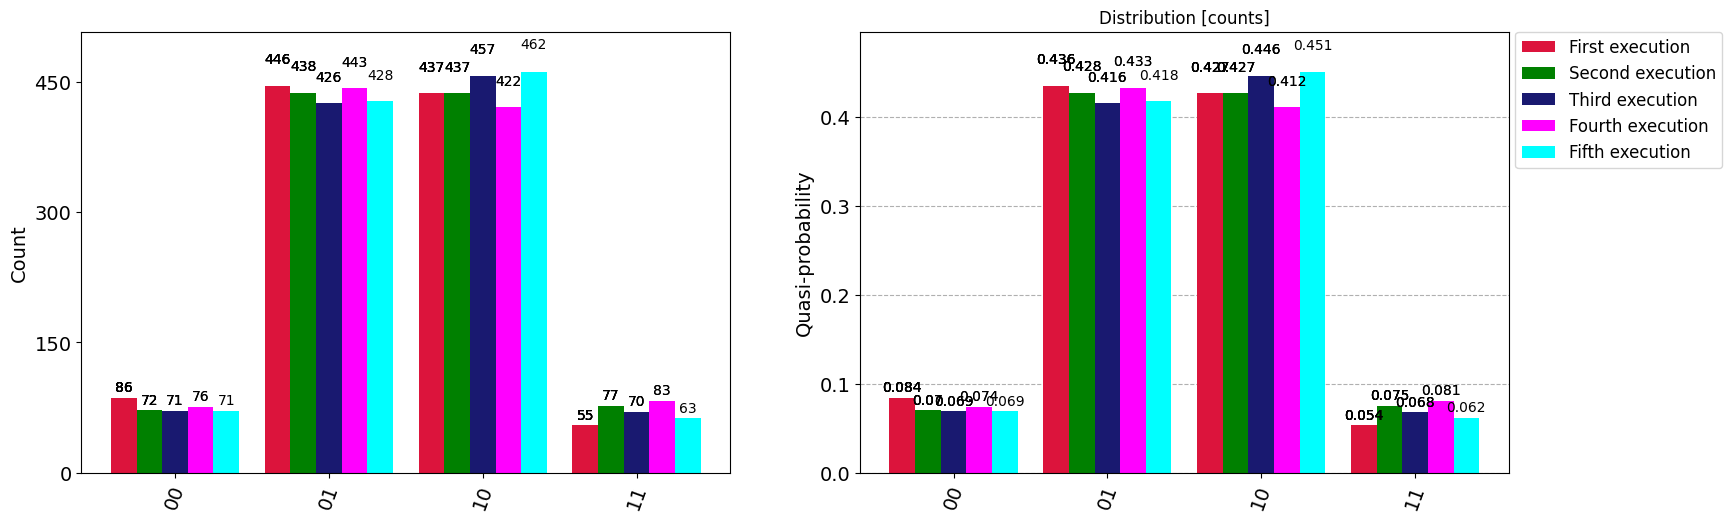

In [6]:
result = plot(circuitX, plots_path + "xw_results.png")

In [7]:
xw = []
for i in result:
    xw.append(calcutations_table(i))
    print("=====")

'& 00 &  1 &  1 &  1 & 0.0839844 & 0.0839844 \\'

'& 01 & -1 &  1 & -1 & 0.4355469 & -0.4355469 \\'

'& 10 &  1 & -1 & -1 & 0.4267578 & -0.4267578 \\'

'& 11 & -1 & -1 &  1 & 0.0537109 & 0.0537109 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0703125 & 0.0703125 \\'

'& 01 & -1 &  1 & -1 & 0.4277344 & -0.4277344 \\'

'& 10 &  1 & -1 & -1 & 0.4267578 & -0.4267578 \\'

'& 11 & -1 & -1 &  1 & 0.0751953 & 0.0751953 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0693359 & 0.0693359 \\'

'& 01 & -1 &  1 & -1 & 0.4160156 & -0.4160156 \\'

'& 10 &  1 & -1 & -1 & 0.4462891 & -0.4462891 \\'

'& 11 & -1 & -1 &  1 & 0.0683594 & 0.0683594 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0742188 & 0.0742188 \\'

'& 01 & -1 &  1 & -1 & 0.4326172 & -0.4326172 \\'

'& 10 &  1 & -1 & -1 & 0.4121094 & -0.4121094 \\'

'& 11 & -1 & -1 &  1 & 0.0810547 & 0.0810547 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0693359 & 0.0693359 \\'

'& 01 & -1 &  1 & -1 & 0.4179688 & -0.4179688 \\'

'& 10 &  1 & -1 & -1 & 0.4511719 & -0.4511719 \\'

'& 11 & -1 & -1 &  1 & 0.0615234 & 0.0615234 \\'

=====


## X ⊗ V

In [8]:
qx= QuantumRegister(nx,'q')
cx= ClassicalRegister(nx,'c')
circuitX=QuantumCircuit(qx,cx)

circuitX.x(qx[0])
circuitX.x(qx[1])

circuitX.barrier(qx[0],qx[1])
circuitX.h(qx[0])
circuitX.cx(qx[0],qx[1])

circuitX.barrier(qx[0],qx[1])
circuitX.h(qx[1])
circuitX.s(qx[0])
circuitX.h(qx[0])
circuitX.tdg(qx[0])
circuitX.h(qx[0])

circuitX.barrier(qx[0],qx[1])
circuitX.measure(qx[0],cx[0])
circuitX.measure(qx[1],cx[1])

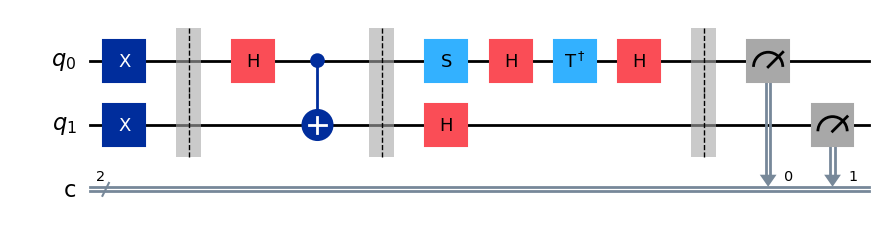

In [9]:
fig = circuitX.draw(output='mpl', style="iqp")
fig.savefig(plots_path + "xv_circuit.png")
fig

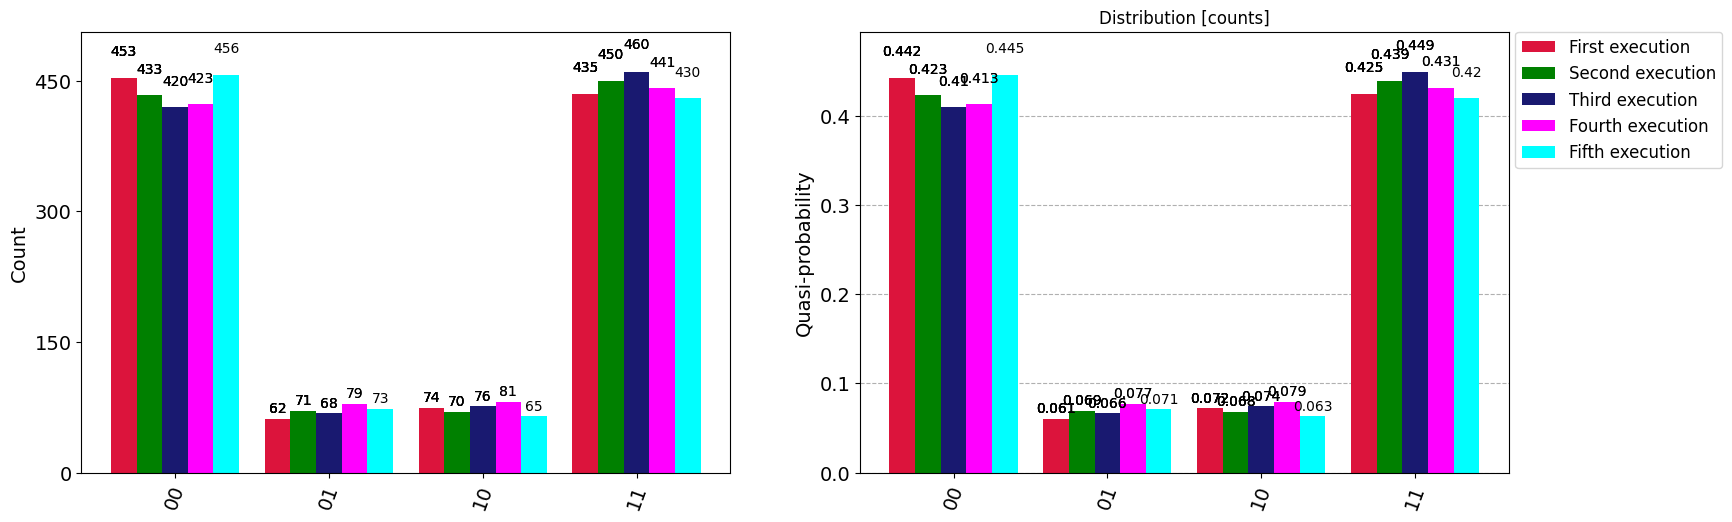

In [10]:
result = plot(circuitX, plots_path + "xv_results.png")

In [11]:
xv = []
for i in result:
    xv.append(calcutations_table(i))
    print("=====")

'& 00 &  1 &  1 &  1 & 0.4423828 & 0.4423828 \\'

'& 01 & -1 &  1 & -1 & 0.0605469 & -0.0605469 \\'

'& 10 &  1 & -1 & -1 & 0.0722656 & -0.0722656 \\'

'& 11 & -1 & -1 &  1 & 0.4248047 & 0.4248047 \\'

=====


'& 00 &  1 &  1 &  1 & 0.4228516 & 0.4228516 \\'

'& 01 & -1 &  1 & -1 & 0.0693359 & -0.0693359 \\'

'& 10 &  1 & -1 & -1 & 0.0683594 & -0.0683594 \\'

'& 11 & -1 & -1 &  1 & 0.4394531 & 0.4394531 \\'

=====


'& 00 &  1 &  1 &  1 & 0.4101562 & 0.4101562 \\'

'& 01 & -1 &  1 & -1 & 0.0664062 & -0.0664062 \\'

'& 10 &  1 & -1 & -1 & 0.0742188 & -0.0742188 \\'

'& 11 & -1 & -1 &  1 & 0.4492188 & 0.4492188 \\'

=====


'& 00 &  1 &  1 &  1 & 0.4130859 & 0.4130859 \\'

'& 01 & -1 &  1 & -1 & 0.0771484 & -0.0771484 \\'

'& 10 &  1 & -1 & -1 & 0.0791016 & -0.0791016 \\'

'& 11 & -1 & -1 &  1 & 0.4306641 & 0.4306641 \\'

=====


'& 00 &  1 &  1 &  1 & 0.4453125 & 0.4453125 \\'

'& 01 & -1 &  1 & -1 & 0.0712891 & -0.0712891 \\'

'& 10 &  1 & -1 & -1 & 0.0634766 & -0.0634766 \\'

'& 11 & -1 & -1 &  1 & 0.4199219 & 0.4199219 \\'

=====


## Z ⊗ W

In [12]:
qx= QuantumRegister(nx,'q')
cx= ClassicalRegister(nx,'c')
circuitX=QuantumCircuit(qx,cx)

circuitX.x(qx[0])
circuitX.x(qx[1])

circuitX.barrier(qx[0],qx[1])
circuitX.h(qx[0])
circuitX.cx(qx[0],qx[1])

circuitX.barrier(qx[0],qx[1])
circuitX.s(qx[0])
circuitX.h(qx[0])
circuitX.t(qx[0])
circuitX.h(qx[0])

circuitX.barrier(qx[0],qx[1])
circuitX.measure(qx[0],cx[0])
circuitX.measure(qx[1],cx[1])

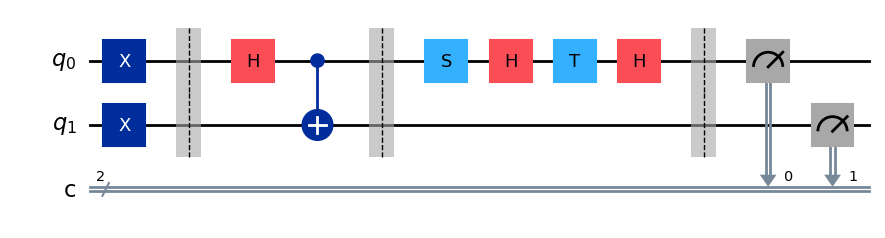

In [13]:
fig = circuitX.draw(output='mpl', style="iqp")
fig.savefig(plots_path + "zw_circuit.png")
fig

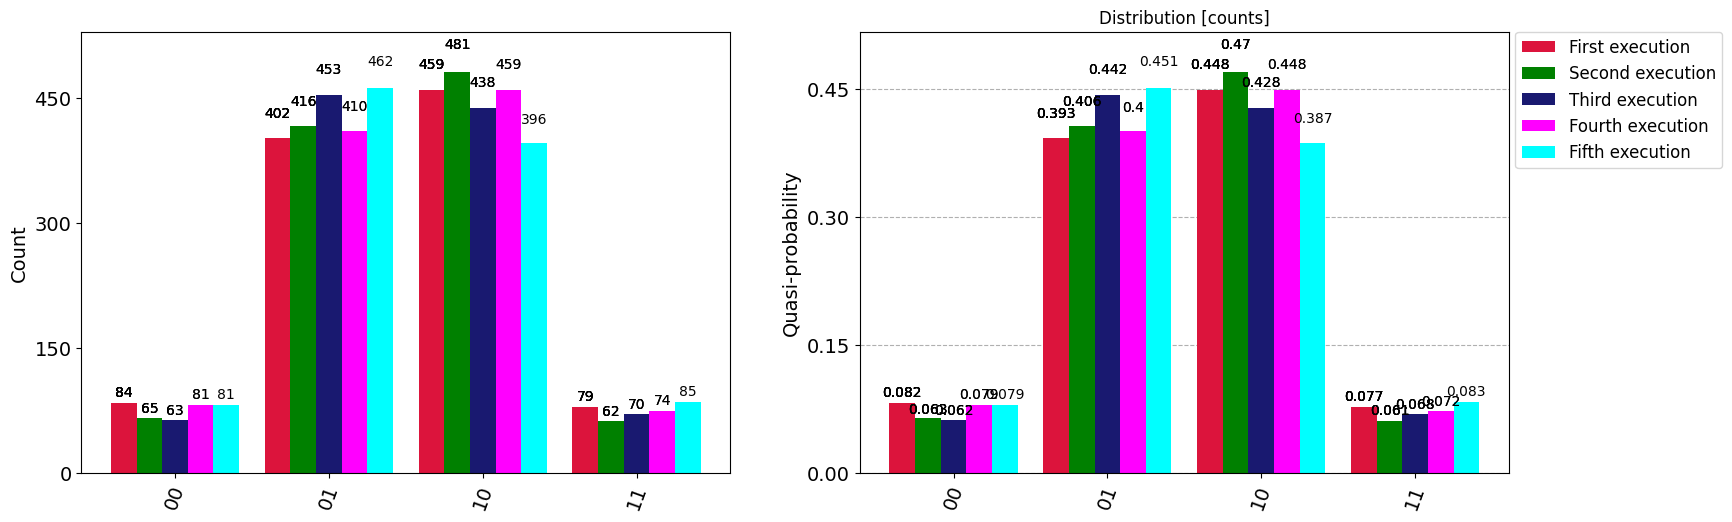

In [14]:
result = plot(circuitX, plots_path + "zw_results.png")

In [15]:
zw = []
for i in result:
    zw.append(calcutations_table(i))
    print("=====")

'& 00 &  1 &  1 &  1 & 0.0820312 & 0.0820312 \\'

'& 01 & -1 &  1 & -1 & 0.3925781 & -0.3925781 \\'

'& 10 &  1 & -1 & -1 & 0.4482422 & -0.4482422 \\'

'& 11 & -1 & -1 &  1 & 0.0771484 & 0.0771484 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0634766 & 0.0634766 \\'

'& 01 & -1 &  1 & -1 & 0.4062500 & -0.4062500 \\'

'& 10 &  1 & -1 & -1 & 0.4697266 & -0.4697266 \\'

'& 11 & -1 & -1 &  1 & 0.0605469 & 0.0605469 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0615234 & 0.0615234 \\'

'& 01 & -1 &  1 & -1 & 0.4423828 & -0.4423828 \\'

'& 10 &  1 & -1 & -1 & 0.4277344 & -0.4277344 \\'

'& 11 & -1 & -1 &  1 & 0.0683594 & 0.0683594 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0791016 & 0.0791016 \\'

'& 01 & -1 &  1 & -1 & 0.4003906 & -0.4003906 \\'

'& 10 &  1 & -1 & -1 & 0.4482422 & -0.4482422 \\'

'& 11 & -1 & -1 &  1 & 0.0722656 & 0.0722656 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0791016 & 0.0791016 \\'

'& 01 & -1 &  1 & -1 & 0.4511719 & -0.4511719 \\'

'& 10 &  1 & -1 & -1 & 0.3867188 & -0.3867188 \\'

'& 11 & -1 & -1 &  1 & 0.0830078 & 0.0830078 \\'

=====


## Z ⊗ V

In [16]:
qx= QuantumRegister(nx,'q')
cx= ClassicalRegister(nx,'c')
circuitX=QuantumCircuit(qx,cx)

circuitX.x(qx[0])
circuitX.x(qx[1])

circuitX.barrier(qx[0],qx[1])
circuitX.h(qx[0])
circuitX.cx(qx[0],qx[1])

circuitX.barrier(qx[0],qx[1])
circuitX.s(qx[0])
circuitX.h(qx[0])
circuitX.tdg(qx[0])
circuitX.h(qx[0])

circuitX.barrier(qx[0],qx[1])
circuitX.measure(qx[0],cx[0])
circuitX.measure(qx[1],cx[1])

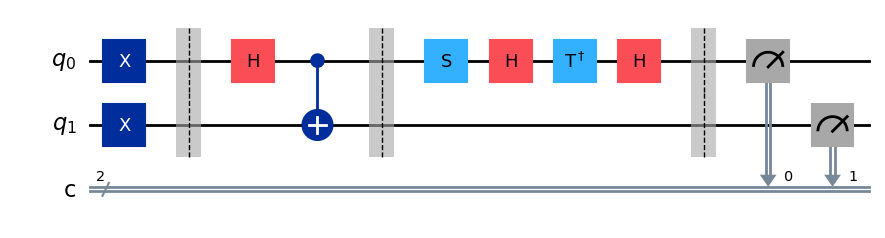

In [17]:
fig = circuitX.draw(output='mpl', style="iqp")
fig.savefig(plots_path + "zv_circuit.png")
fig

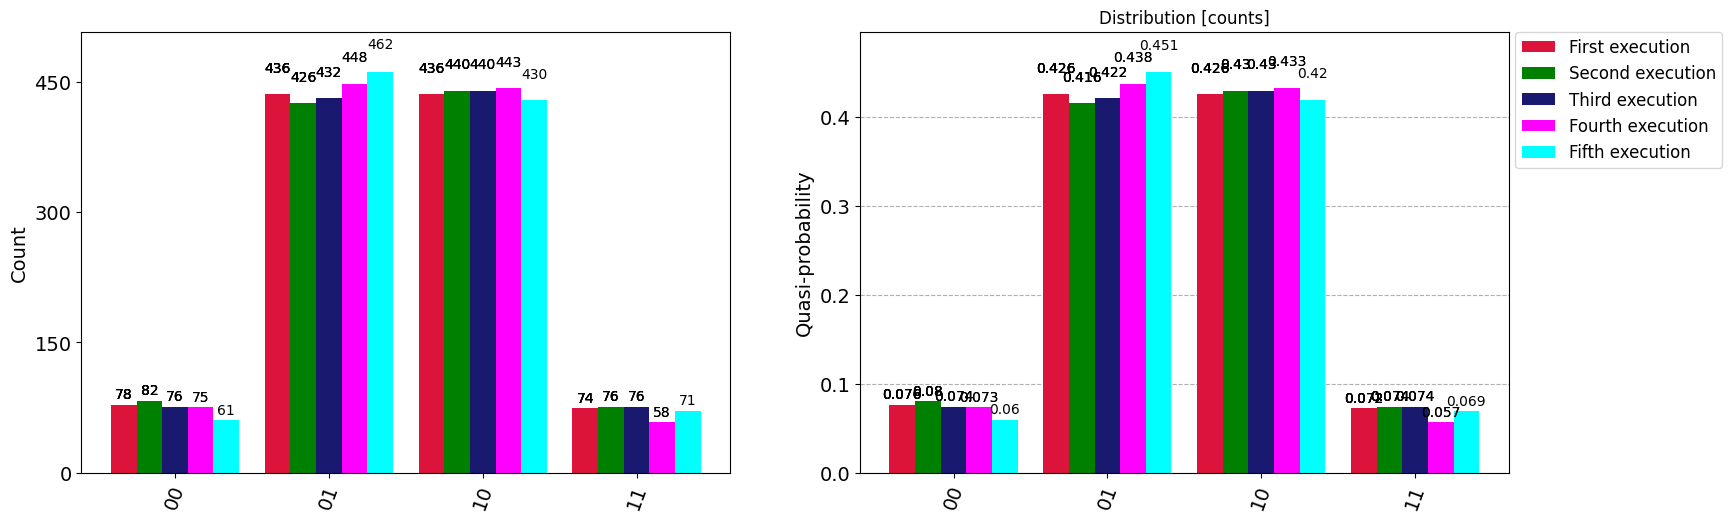

In [18]:
result = plot(circuitX, plots_path + "zv_results.png")

In [19]:
zv = []
for i in result:
    zv.append(calcutations_table(i))
    print("=====")

'& 00 &  1 &  1 &  1 & 0.0761719 & 0.0761719 \\'

'& 01 & -1 &  1 & -1 & 0.4257812 & -0.4257812 \\'

'& 10 &  1 & -1 & -1 & 0.4257812 & -0.4257812 \\'

'& 11 & -1 & -1 &  1 & 0.0722656 & 0.0722656 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0800781 & 0.0800781 \\'

'& 01 & -1 &  1 & -1 & 0.4160156 & -0.4160156 \\'

'& 10 &  1 & -1 & -1 & 0.4296875 & -0.4296875 \\'

'& 11 & -1 & -1 &  1 & 0.0742188 & 0.0742188 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0742188 & 0.0742188 \\'

'& 01 & -1 &  1 & -1 & 0.4218750 & -0.4218750 \\'

'& 10 &  1 & -1 & -1 & 0.4296875 & -0.4296875 \\'

'& 11 & -1 & -1 &  1 & 0.0742188 & 0.0742188 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0732422 & 0.0732422 \\'

'& 01 & -1 &  1 & -1 & 0.4375000 & -0.4375000 \\'

'& 10 &  1 & -1 & -1 & 0.4326172 & -0.4326172 \\'

'& 11 & -1 & -1 &  1 & 0.0566406 & 0.0566406 \\'

=====


'& 00 &  1 &  1 &  1 & 0.0595703 & 0.0595703 \\'

'& 01 & -1 &  1 & -1 & 0.4511719 & -0.4511719 \\'

'& 10 &  1 & -1 & -1 & 0.4199219 & -0.4199219 \\'

'& 11 & -1 & -1 &  1 & 0.0693359 & 0.0693359 \\'

=====


## |⟨S⟩|

In [20]:
result = []
for i in range(len(xv)):
    result.append(xw[i] - xv[i] + zw[i] + zv[i])
result = [abs(r) for r in result]

print(result)
print(np.mean(result))
print("STD:", np.std(result))

[2.84375, 2.876953125, 2.88671875, 2.814453125, 2.88671875]
2.86171875
STD: 0.028421827755595697
